## Step 1: Setup Python Packages

In [1]:
!pip install librosa noisereduce

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer, Bidirectional, Dropout
from keras.optimizers import Adam

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np
import librosa
import noisereduce as nr

## Step 2: Load Dataset

In [3]:
X = np.load('audio.npy')
y = np.load('labels.npy')

## Step 3: Split Data Into Training and Validation Sets

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=44)

## Step 4: Function to Add Noise to Audio Data

In [5]:
def add_noise(data, noise_factor=0.2):
    noise = np.random.randn(*data.shape).astype(np.float32)
    augmented_data = data + noise_factor * noise
    return augmented_data

## Step 5: Add Noise to Training Data to Simulate Real-world Conditions

In [6]:
X_train_noisy = add_noise(X_train)

## Step 6: Build Model

In [7]:
model = Sequential([
    InputLayer(input_shape=(100, 13)),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Dropout for regularization and to prevent overfitting
    Dense(y.shape[2], activation='softmax')
])

## Step 7: Compile Model

In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

## Step 8: Train  Model on Noisy Data


In [9]:
history = model.fit(X_train_noisy, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
3/3 [==============================] - 10s 1s/step - loss: 1.7723 - accuracy: 0.0059 - val_loss: 1.6880 - val_accuracy: 0.0245
Epoch 2/10
3/3 [==============================] - 1s 260ms/step - loss: 1.6916 - accuracy: 0.0199 - val_loss: 1.6103 - val_accuracy: 0.0240
Epoch 3/10
3/3 [==============================] - 1s 202ms/step - loss: 1.6219 - accuracy: 0.0230 - val_loss: 1.5345 - val_accuracy: 0.0240
Epoch 4/10
3/3 [==============================] - 1s 345ms/step - loss: 1.5438 - accuracy: 0.0333 - val_loss: 1.4612 - val_accuracy: 0.0285
Epoch 5/10
3/3 [==============================] - 1s 332ms/step - loss: 1.4818 - accuracy: 0.0315 - val_loss: 1.3970 - val_accuracy: 0.0480
Epoch 6/10
3/3 [==============================] - 1s 286ms/step - loss: 1.4300 - accuracy: 0.0340 - val_loss: 1.3520 - val_accuracy: 0.0480
Epoch 7/10
3/3 [==============================] - 1s 309ms/step - loss: 1.3940 - accuracy: 0.0355 - val_loss: 1.3254 - val_accuracy: 0.0490
Epoch 8/10
3/3 [======

## Step 9: Training and Validation Loss

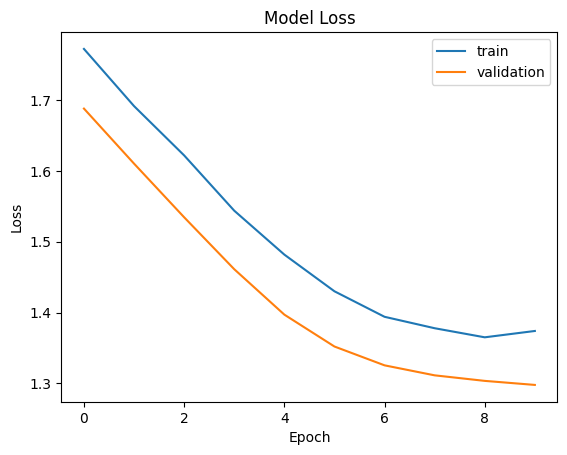

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Step 10: Save Trained Model

In [11]:
model.save('robust_asr_model.keras')